# Важно! 
Это задание на самопроверку, оно необязательное, и мы не будем оценивать качество его решения. Настоятельно рекомендуем вам попробовать найти ответ самостоятельно.

Имеются две базы данных (два листа Excel-файла): база с ценами конкурентов (Data_Parsing) и внутренняя база компании (Data_Company).

В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.

В базе компании есть два аналогичных поля: item_id и color_id.

Нам известно, что коды в двух базах отличаются наличием набора служебных символов. В базе парсинга встречаются следующие символы: _, -, ~, \\, /.

Необходимо:

1 Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
2 Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы цен в % (цена конкурента к нашей цене).  
3 Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.  
4 Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3 (можно добавить столбец outlier и проставить Yes для выбросов).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px 

In [3]:
tsum = pd.read_excel('data/Data_TSUM.xlsx', sheet_name= ['Data_Parsing', 'Data_Company'])
tsum

{'Data_Parsing':            brand Category   producer_id producer_color  price
 0      Valentino    Shoes  aaaaa1111_11          black    167
 1      Valentino    Shoes  aaaaa1111_12          black    188
 2      Valentino    Shoes  aaaaa1111_13          black    184
 3      Valentino    Shoes  aaaaa1111_14        bla//ck    196
 4      Valentino    Shoes  aaaaa1111_15        bla\\ck    250
 ..           ...      ...           ...            ...    ...
 70  Stone Island     Bags  sssss1111_31         ~~~red    164
 71  Stone Island     Bags  sssss1111_32         ~~~red    158
 72  Stone Island     Bags  sssss1111_33         ~~~red    194
 73  Stone Island     Bags  sssss1111_34         ~~~red    256
 74  Stone Island     Bags  sssss1111_35         ~~~red    205
 
 [75 rows x 5 columns],
 'Data_Company':            brand Category      item_id color_id  current price
 0      Valentino    Shoes  aaaaa111111    black            247
 1      Valentino    Shoes  aaaaa111112    black          

In [4]:
Data_Company = tsum['Data_Company']
print(Data_Company)

           brand Category      item_id color_id  current price
0      Valentino    Shoes  aaaaa111111    black            247
1      Valentino    Shoes  aaaaa111112    black            161
2      Valentino    Shoes  aaaaa111113    black            234
3      Valentino    Shoes  aaaaa111114    black            167
4      Valentino    Shoes  aaaaa111115    black            153
..           ...      ...          ...      ...            ...
70  Stone Island     Bags  sssss111131      red            165
71  Stone Island     Bags  sssss111132      red            196
72  Stone Island     Bags  sssss111133      red            236
73  Stone Island     Bags  sssss111134      red            222
74  Stone Island     Bags  sssss111135      red            275

[75 rows x 5 columns]


In [5]:
Data_Parsing = tsum['Data_Parsing']
print(Data_Parsing)

           brand Category   producer_id producer_color  price
0      Valentino    Shoes  aaaaa1111_11          black    167
1      Valentino    Shoes  aaaaa1111_12          black    188
2      Valentino    Shoes  aaaaa1111_13          black    184
3      Valentino    Shoes  aaaaa1111_14        bla//ck    196
4      Valentino    Shoes  aaaaa1111_15        bla\\ck    250
..           ...      ...           ...            ...    ...
70  Stone Island     Bags  sssss1111_31         ~~~red    164
71  Stone Island     Bags  sssss1111_32         ~~~red    158
72  Stone Island     Bags  sssss1111_33         ~~~red    194
73  Stone Island     Bags  sssss1111_34         ~~~red    256
74  Stone Island     Bags  sssss1111_35         ~~~red    205

[75 rows x 5 columns]


In [6]:
Data_Parsing['producer_id'] = Data_Parsing['producer_id'].apply(lambda x: x.replace('_',''))

Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(lambda  x: x.replace('/', '') ) 
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(lambda  x: x.replace('\\', '')) 
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(lambda  x: x.replace('~', '') ) 
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(lambda  x: x.replace('_', '') )
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(lambda  x: x.replace('-', '') ) 

In [7]:
Data_Parsing.value_counts(normalize=True)

brand      Category  producer_id  producer_color  price
Brioni     Bags      bbbbb111125  red             180      0.013333
Valentino  Bags      aaaaa111131  red             256      0.013333
                     aaaaa111129  red             192      0.013333
                     aaaaa111128  red             284      0.013333
                     aaaaa111127  red             293      0.013333
                                                             ...   
Brioni     Shoes     bbbbb111124  white           298      0.013333
                     bbbbb111123  white           277      0.013333
                     bbbbb111122  white           260      0.013333
                     bbbbb111121  white           238      0.013333
Valentino  Shoes     aaaaa111124  white           259      0.013333
Length: 75, dtype: float64

In [8]:
Data_Company.value_counts(normalize=True)

brand      Category  item_id      color_id  current price
Brioni     Bags      bbbbb111125  red       153              0.013333
Valentino  Bags      aaaaa111131  red       189              0.013333
                     aaaaa111129  red       206              0.013333
                     aaaaa111128  red       252              0.013333
                     aaaaa111127  red       203              0.013333
                                                               ...   
Brioni     Shoes     bbbbb111124  white     183              0.013333
                     bbbbb111123  white     288              0.013333
                     bbbbb111122  white     270              0.013333
                     bbbbb111121  white     216              0.013333
Valentino  Shoes     aaaaa111124  white     237              0.013333
Length: 75, dtype: float64

In [9]:
company = Data_Company.merge(
    Data_Parsing,
    #on='brand',
    left_on= 'item_id',
    right_on= 'producer_id', 
    how='left',
    left_index=False
)
display(company)

,brand_x,Category_x,item_id,color_id,current price,brand_y,Category_y,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,247,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,161,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,234,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,167,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,153,Valentino,Shoes,aaaaa111115,black,250
...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,196,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,236,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,222,Stone Island,Bags,sssss111134,red,256


In [10]:
company['price_itog'] = ((company['price'] - company['current price'] )/ company['current price'] * 100).round(2)
display(company)

,brand_x,Category_x,item_id,color_id,current price,brand_y,Category_y,producer_id,producer_color,price,price_itog
0,Valentino,Shoes,aaaaa111111,black,247,Valentino,Shoes,aaaaa111111,black,167,-32.39
1,Valentino,Shoes,aaaaa111112,black,161,Valentino,Shoes,aaaaa111112,black,188,16.77
2,Valentino,Shoes,aaaaa111113,black,234,Valentino,Shoes,aaaaa111113,black,184,-21.37
3,Valentino,Shoes,aaaaa111114,black,167,Valentino,Shoes,aaaaa111114,black,196,17.37
4,Valentino,Shoes,aaaaa111115,black,153,Valentino,Shoes,aaaaa111115,black,250,63.40
...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165,Stone Island,Bags,sssss111131,red,164,-0.61
71,Stone Island,Bags,sssss111132,red,196,Stone Island,Bags,sssss111132,red,158,-19.39
72,Stone Island,Bags,sssss111133,red,236,Stone Island,Bags,sssss111133,red,194,-17.80
73,Stone Island,Bags,sssss111134,red,222,Stone Island,Bags,sssss111134,red,256,15.32


In [11]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.14.1


In [12]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [13]:
outliers, cleaned = outliers_iqr_mod(company, 'price_itog')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 0
Результирующее число записей: 75


In [14]:
#line_data = company.groupby('brand_x', as_index=False)
fig = px.box(
    data_frame=company, #DataFrame
    y='Category_x', #ось абсцисс
    x='price_itog', #ось ординат
    color='brand_x',
    #height=500, #высота
    #width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

Text(0.5, 1.0, 'Cleaned Full Square Boxplot')

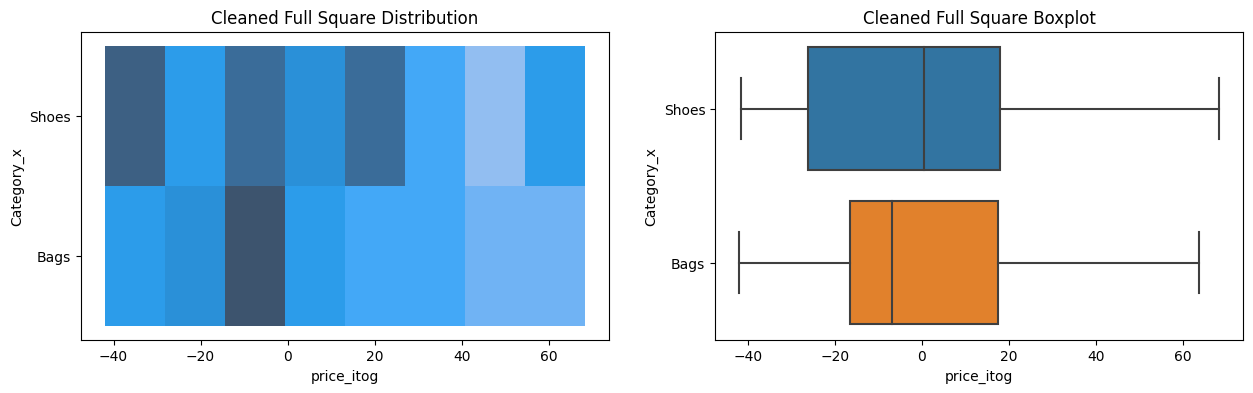

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='price_itog',y='Category_x', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='price_itog',y='Category_x', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot')

In [16]:
company['price_itog'].describe()

count    75.000000
mean      2.660000
std      28.809968
min     -41.980000
25%     -18.865000
50%      -3.700000
75%      17.915000
max      68.420000
Name: price_itog, dtype: float64

In [31]:
fig = px.scatter(
    data_frame=company, #DataFrame
    y='color_id', #ось абсцисс
    x='brand_x', #ось ординат
    
    color='price_itog',
    #height=500, #высота
    #width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()